In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [233]:
df=pd.read_csv(r"app_data.csv")

In [234]:
df.shape

(16140, 40)

In [235]:
df.iloc[0]

lang                                                                  bn
title                  MX TakaTak Short Video App | Made in India for...
description            ☆  ভারতের অরিজিনাল শর্ট ভিডিয়ো অ্যাপ ☆ মিউজিক ...
descriptionHTML        ☆ <b> ভারতের অরিজিনাল শর্ট ভিডিয়ো অ্যাপ ☆ মিউজ...
summary                শর্ট ভিডিয়ো কমিউনিটি: মজাদার, রিয়াল ভিডিয়ো সঙ্...
installs                                                    ১০০,০০০,০০০+
minInstalls                                                    100000000
maxInstalls                                                    128697797
score                                                            4.11678
scoreText                                                            ৪.১
ratings                                                           484806
reviews                                                           190545
histogram                                                [object Object]
price                                              

In [264]:
df[["lang","appId","maxInstalls","score","price","ratings","reviews","free","offersIAP","genreId","adSupported","editorsChoice"]].iloc[0:5]

,lang,appId,maxInstalls,score,price,ratings,reviews,free,offersIAP,genreId,adSupported,editorsChoice
0,bn,com.next.innovation.takatak,128697797,4.116779,0.0,484806,190545,True,False,SOCIAL,True,False
1,bn,com.eterno.shortvideos,82094091,4.166140,0.0,275784,123278,True,False,SOCIAL,False,False
2,bn,com.snapchat.android,1506245608,4.309604,0.0,25185386,9161848,True,True,SOCIAL,True,True
3,bn,in.mohalla.video,127859998,4.266748,0.0,528486,186202,True,False,SOCIAL,False,False
4,bn,com.instagram.android,3367042295,4.359112,0.0,113498100,37618250,True,True,SOCIAL,True,True


In [236]:
df[df['currency']=='USD'][df['price']==0].shape

/home/sarkar4540/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(7624, 40)

In [237]:
uniqueAppIds=df['appId'].unique()

Which is the most popular category of apps in Indian Languages?

In [258]:
data=[]
for category in df['genreId'].unique():
    data.append([category,df[df['genreId']==category]['score'].mean(),df[df['genreId']==category]['maxInstalls'].sum()])
df_sorted_installs=pd.DataFrame(data,columns=['category','avg_score','total_maxInstalls'])

data=[]
for category in df['genreId'].unique():
    df_category=df[df['genreId']==category]
    df_category_price=df_category[df_category["price"]>0]
    data.append([category,df_category_price['price'].mean(),(df_category_price['price']*df_category_price['maxInstalls']).sum()])
df_sorted_price=pd.DataFrame(data,columns=['category','avg_price','total_price'])

In [259]:
df_sorted_installs=df_sorted_installs.sort_values('total_maxInstalls',ascending=False)
df_sorted_price=df_sorted_price.sort_values('total_price',ascending=False)

([<matplotlib.patches.Wedge at 0x7f67b9625ba8>,
 [Text(-0.33754714939223146, 1.0469297597915435, 'GAME_ARCADE'),
  Text(-0.7285337092536402, -0.8241593501751543, 'GAME_ACTION'),
  Text(-0.353342754303355, -1.0417048036662397, 'GAME_PUZZLE'),
  Text(-0.044742766827621044, -1.0990896618641308, 'GAME_ADVENTURE'),
  Text(0.16920955472030752, -1.086907598000564, 'GAME_SIMULATION'),
  Text(0.3387959552286839, -1.0465263019727138, 'COMMUNICATION'),
  Text(0.4892015513634517, -0.9852318722735234, 'GAME_RACING'),
  Text(0.6167841026429669, -0.9108113804333531, 'GAME_STRATEGY'),
  Text(0.7247599404777814, -0.8274799264505713, 'TOOLS'),
  Text(0.813187392384882, -0.7407605988889231, 'MUSIC_AND_AUDIO'),
  Text(0.8844621251436993, -0.6540082179807003, 'GAME_SPORTS'),
  Text(0.9375570365976749, -0.5753145253912736, 'BOOKS_AND_REFERENCE'),
  Text(0.9754918713549708, -0.5083459539726632, 'GAME_BOARD'),
  Text(1.006641025361296, -0.4434792509910229, 'VIDEO_PLAYERS'),
  Text(1.0313625920591682, -0.38248

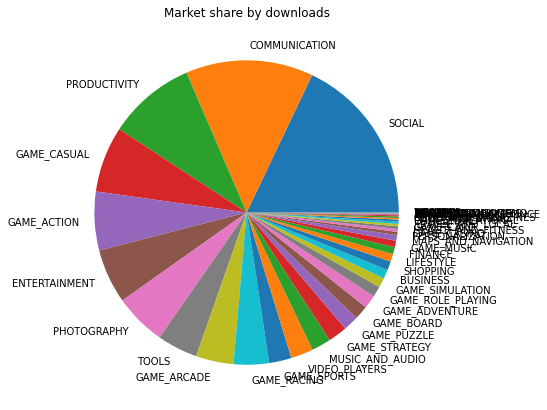

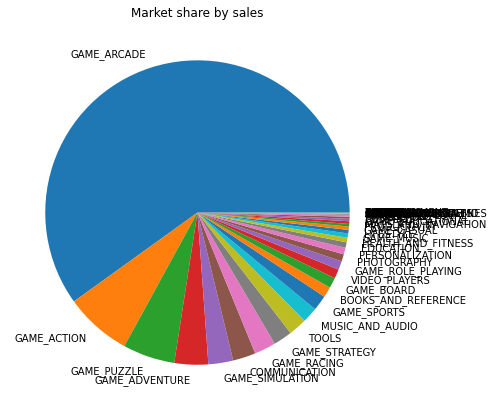

In [262]:
plt.figure(figsize=(7,7))
plt.title("Market share by downloads")
plt.pie(df_sorted_installs['total_maxInstalls'].to_numpy(),labels=list(df_sorted_installs['category'].array))

plt.figure(figsize=(7,7))
plt.title("Market share by sales")
plt.pie(df_sorted_price['total_price'].to_numpy(),labels=list(df_sorted_price['category'].array))

In [267]:
print(df_sorted_price)
print(df_sorted_installs)

               category    avg_price   total_price
29          GAME_ARCADE   162.291053  4.664751e+11
32          GAME_ACTION   173.707561  5.528284e+10
36          GAME_PUZZLE   192.941176  4.305006e+10
35       GAME_ADVENTURE   221.117375  2.789453e+10
38      GAME_SIMULATION   198.870968  2.045209e+10
2         COMMUNICATION   342.661972  1.885577e+10
37          GAME_RACING   158.285000  1.776103e+10
42        GAME_STRATEGY   188.723404  1.553318e+10
1                 TOOLS   100.315932  1.520840e+10
9       MUSIC_AND_AUDIO   214.390071  1.270383e+10
31          GAME_SPORTS   404.750000  1.259705e+10
23  BOOKS_AND_REFERENCE   313.000000  8.792273e+09
30           GAME_BOARD   268.766667  8.547661e+09
3         VIDEO_PLAYERS   203.000000  7.663490e+09
34    GAME_ROLE_PLAYING   122.142857  7.163990e+09
11          PHOTOGRAPHY   380.375000  5.910778e+09
17      PERSONALIZATION    70.183511  5.569774e+09
8             EDUCATION   146.883854  4.450960e+09
19   HEALTH_AND_FITNESS   166.3

In [241]:
appId=df.iloc[0]["appId"]
print(appId)
for lang in df["lang"].unique():
    df_appId=df[df["appId"]==appId]
    print(df_appId[df["lang"]==lang]["reviews"])


com.next.innovation.takatak
0    190545
Name: reviews, dtype: int64
200    190547
Name: reviews, dtype: int64
400    190547
Name: reviews, dtype: int64
600    184141
Name: reviews, dtype: int64
800    190661
Name: reviews, dtype: int64
1000    190577
Name: reviews, dtype: int64
1200    190577
Name: reviews, dtype: int64
1400    190577
Name: reviews, dtype: int64
1600    190588
Name: reviews, dtype: int64
1800    190582
Name: reviews, dtype: int64


/home/sarkar4540/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [242]:
dfr=pd.read_csv(r"review_data.csv")
dfr.iloc[0]

/home/sarkar4540/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


lang                                                        bn
appId                              com.next.innovation.takatak
id           gp:AOqpTOFXfZc_s0J4yIZMC-qhQv3vnaV7zUyhUdTT9c1...
userName                                    Ram bollabh Barman
userImage    https://play-lh.googleusercontent.com/-09Tab8P...
date                                  2021-02-23T12:51:25.917Z
score                                                        5
scoreText                                                    5
url          https://play.google.com/store/apps/details?id=...
title                                                      NaN
text                                                   কাদেরকে
replyDate                                                  NaN
replyText                                                  NaN
version                                                 1.10.9
thumbsUp                                                     1
criterias                                              

In [243]:
dfr.shape

(1636628, 16)

In [244]:
langs=dfr["lang"].unique()

In [266]:
dfr[["lang","appId","score","date","text","replyDate","replyText","thumbsUp"]][0:5]

,lang,appId,score,date,text,replyDate,replyText,thumbsUp
0,bn,com.next.innovation.takatak,5,2021-02-23T12:51:25.917Z,কাদেরকে,NaN,NaN,1
1,bn,com.next.innovation.takatak,5,2021-02-20T15:08:09.482Z,ভালো নয়,NaN,NaN,0
2,bn,com.next.innovation.takatak,5,2021-02-19T13:52:27.281Z,Nice,NaN,NaN,0
3,bn,com.next.innovation.takatak,3,2021-02-18T16:00:29.883Z,100 video views but not money 😡😡😡 Fake app😠🤮😡,NaN,NaN,31
4,bn,com.next.innovation.takatak,5,2021-02-16T08:49:05.680Z,Rr,NaN,NaN,0


In [245]:
lang_scores=[[],[],[],[]]
for lang in langs:
    lang_scores[0].append(dfr[dfr["lang"]==lang]["appId"].count())
    lang_scores[1].append(dfr[dfr["lang"]==lang][dfr['score']>4]["appId"].count())
    lang_scores[2].append(dfr[dfr["lang"]==lang]["replyText"].count())
    lang_scores[3].append(dfr[dfr["lang"]==lang][dfr['thumbsUp']>0]["appId"].count())

/home/sarkar4540/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/sarkar4540/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[131511, 177606, 943886, 28703, 18561, 192622, 5142, 15557, 80653, 42387]
[98889, 137805, 698778, 20069, 13742, 143196, 3739, 11864, 60087, 31074]
[5714, 8451, 89150, 2225, 974, 10257, 134, 685, 3901, 2760]
[68169, 81433, 253192, 17731, 11623, 82780, 3810, 9474, 43332, 22148]


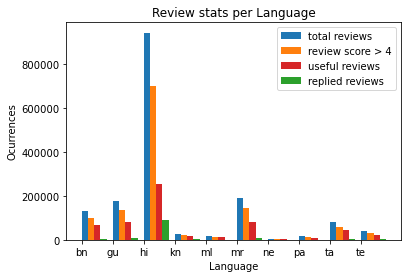

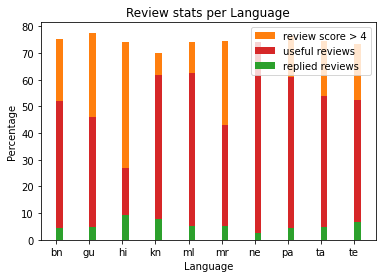

In [246]:
x = np.arange(len(lang_scores[0]))
width = 0.20

print(lang_scores[0])
print(lang_scores[1])
print(lang_scores[2])
print(lang_scores[3])

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Review stats per Language')
plt.xlabel('Language')
plt.ylabel('Ocurrences')
axes.bar(x, lang_scores[0], width=width, align='edge', label="total reviews")
axes.bar(x+width, lang_scores[1], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[1]['color'], label="review score > 4")
axes.bar(x+2*width, lang_scores[3], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[3]['color'], label="useful reviews")
axes.bar(x+3*width, lang_scores[2], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label="replied reviews")
axes.set_xticks(x)
axes.set_xticklabels(langs)
plt.legend()
plt.show()

lang_per=[[],[],[]]
for i in range(0,len(lang_scores[0])):
    lang_per[0].append(100*lang_scores[1][i]/lang_scores[0][i])
    lang_per[1].append(100*lang_scores[2][i]/lang_scores[0][i])
    lang_per[2].append(100*lang_scores[3][i]/lang_scores[0][i])

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Review stats per Language')
plt.xlabel('Language')
plt.ylabel('Percentage')
axes.bar(x, lang_per[0], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[1]['color'], label="review score > 4")
axes.bar(x, lang_per[2], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[3]['color'], label="useful reviews")
axes.bar(x, lang_per[1], width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label="replied reviews")
axes.set_xticks(x)
axes.set_xticklabels(langs)
plt.legend()
plt.show()


In [270]:
print(lang_scores[0])
sums=[0,0,0]
for i in range(len(lang_per[0])):
    sums[0]=sums[0]+lang_per[0]
    sums[0]=sums[0]+lang_per[0]
    sums[0]=sums[0]+lang_per[0]
print(lang_per[0])
print(lang_per[1])
print(lang_per[2])


[131511, 177606, 943886, 28703, 18561, 192622, 5142, 15557, 80653, 42387]
[75.19447042452722, 77.59028411202324, 74.03203352947284, 69.919520607602, 74.0369592155595, 74.34041802078683, 72.71489692726566, 76.26149000449958, 74.50063853793411, 73.31021303701607]
[4.344883697941617, 4.758285193067802, 9.444996535598579, 7.751802947427098, 5.247562092559668, 5.324936923092897, 2.605989887203423, 4.403162563476249, 4.8367698659690275, 6.511430391393588]
[51.83520770125693, 45.85036541558281, 26.824425831085534, 61.77403058913703, 62.62054846182856, 42.97536106986741, 74.09568261376896, 60.89863084142187, 53.72645778830298, 52.25186967702361]


In [247]:
iAPSum=0
iAPCount=0
adCount=0
adSum=0
ecCount=0
ecSum=0
allCount=0
for appId in df['appId'].unique():
    allCount=allCount+1
    maxInstalls=df[df["appId"]==appId]["maxInstalls"].iloc[0]
    if df[df["appId"]==appId]["offersIAP"].iloc[0]:
        iAPSum=iAPSum+maxInstalls
        iAPCount=iAPCount+1
    if df[df["appId"]==appId]["adSupported"].iloc[0]:
        adSum=adSum+maxInstalls
        adCount=adCount+1
    if df[df["appId"]==appId]["editorsChoice"].iloc[0]:
        ecSum=ecSum+maxInstalls
        ecCount=ecCount+1

print(iAPSum/iAPCount)
print(adSum/adCount)
print(ecSum/ecCount)

90995089.0525687
75423888.85351788
322593925.1775701


<BarContainer object of 3 artists>

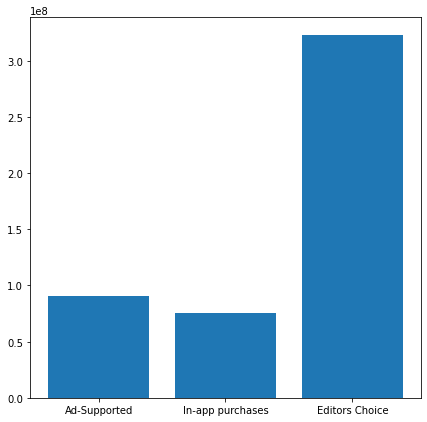

In [248]:
plt.figure(figsize=(7,7))
plt.bar(["Ad-Supported","In-app purchases","Editors Choice"],[iAPSum/iAPCount,adSum/adCount,ecSum/ecCount])